In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
import sqlite3
conn = sqlite3.connect('zippedData/im.db')

In [3]:
q = '''SELECT *
    FROM movie_basics AS mb
    JOIN movie_ratings as mr
        USING ('movie_id')
    
   ;'''

movie_basics_ratings = pd.read_sql(q,conn)
movie_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [59]:
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [60]:
movie_basics_ratings.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [4]:
movie_basics_ratings.dropna(subset=['genres'], inplace=True)
movie_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [5]:
movie_basics_ratings['numvotes'].mean()

3562.1726304550184

In [21]:
condition_on_numvotes = movie_basics_ratings['numvotes'] > 3500
movie_basics_ratings = movie_basics_ratings[condition_on_numvotes]

condition_on_startyear = movie_basics_ratings['start_year'] >= 2012
movie_basics_ratings = movie_basics_ratings[condition_on_startyear]

movie_basics_ratings.reset_index(inplace=True)
movie_basics_ratings

,level_0,index,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
1,1,16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
2,2,31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
3,3,41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
4,4,47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
...,...,...,...,...,...,...,...,...,...,...
3765,4769,73133,tt9364684,Borç Harç,Borç Harç,2019,90.0,Comedy,1.4,3511
3766,4770,73206,tt9412098,Fyre,Fyre,2019,97.0,"Documentary,Music",7.3,25387
3767,4771,73304,tt9495224,Black Mirror: Bandersnatch,Black Mirror: Bandersnatch,2018,90.0,"Drama,Mystery,Sci-Fi",7.3,91349
3768,4772,73374,tt9558612,PM Narendra Modi,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057


In [23]:
genres_rating = movie_basics_ratings[['genres','averagerating']]
genres_rating

,genres,averagerating
0,Drama,6.9
1,"Action,Animation,Comedy",1.9
2,"Action,Crime,Drama",7.1
3,"Adventure,Drama,Romance",6.1
4,"Adventure,Comedy,Drama",7.3
...,...,...
3765,Comedy,1.4
3766,"Documentary,Music",7.3
3767,"Drama,Mystery,Sci-Fi",7.3
3768,"Biography,Drama",3.7


In [24]:
def split(string):
    return string.split(',')

genres_rating['genres'] = genres_rating['genres'].apply(split)
genres_rating

<ipython-input-24-7e01c58eccd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_rating['genres'] = genres_rating['genres'].apply(split)


,genres,averagerating
0,[Drama],6.9
1,"[Action, Animation, Comedy]",1.9
2,"[Action, Crime, Drama]",7.1
3,"[Adventure, Drama, Romance]",6.1
4,"[Adventure, Comedy, Drama]",7.3
...,...,...
3765,[Comedy],1.4
3766,"[Documentary, Music]",7.3
3767,"[Drama, Mystery, Sci-Fi]",7.3
3768,"[Biography, Drama]",3.7


In [25]:
def split_genres(df):
    new_df = pd.DataFrame({},columns=['genres','averagerating'])
    for indx in df.index:
        new = pd.DataFrame({'genres':df.iloc[indx,0],'averagerating':df.iloc[indx,1]})
        new_df = pd.concat([new_df,new],ignore_index=True)
           
    
    return new_df
        

In [26]:
genres_rating = split_genres(genres_rating)

In [27]:
genre_rate = genres_rating.groupby('genres')[['averagerating']].mean().sort_values('averagerating',ascending=False)
genre_rate

,averagerating
genres,
News,7.820000
Documentary,7.348108
Biography,6.995251
War,6.991045
History,6.988957
Sport,6.904687
Animation,6.792442
Music,6.782883
Drama,6.621093


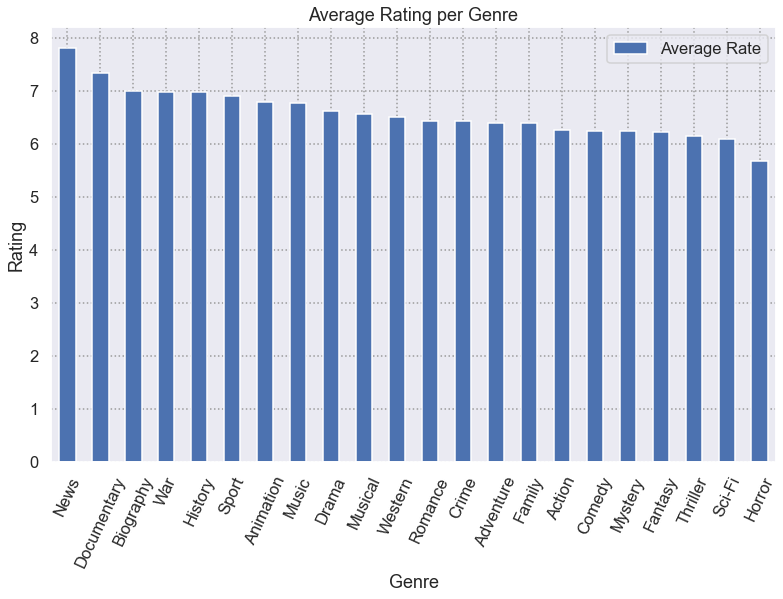

In [39]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_theme()
sns.set_context("talk")
fig,ax =plt.subplots(figsize=(13,8))
genre_rate.plot(kind='bar',ax=ax,rot=65)
ax.set_ylabel('Rating')
ax.set_xlabel('Genre')
plt.title('Average Rating per Genre')
ax.legend(['Average Rate']);

In [28]:
q = '''SELECT *
    FROM movie_basics AS mb
    JOIN movie_ratings as mr
        USING ('movie_id')
    WHERE numvotes > 3500 AND start_year >= 2012
    
;'''

df = pd.read_sql(q,conn)
df1=df.groupby('genres')[['averagerating']].mean().sort_values('averagerating',ascending=False)
df1['count'] = df.groupby('genres')[['averagerating']].count()
df1

,averagerating,count
genres,,
Biography,8.6,1
"Drama,Romance,Sport",8.5,1
"Animation,History",8.3,1
"Documentary,War",8.2,1
"Biography,Documentary,Drama",8.2,2
...,...,...
"Action,Adventure,History",4.5,1
"Crime,Family,Horror",4.5,1
"Crime,Romance,Thriller",4.3,1
